<a href="https://colab.research.google.com/github/salamshakur/CAP4630-Artificial-Intelligence-UCF/blob/master/HW_3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported Libraries

In [0]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import numpy as np
import random
import math
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---


Global Variables

In [0]:
w     = 20
b     = 2
mu    = 10
sigma = 2
m     = 1000

# Problem 1 - Generating random training/testing dataset & display them

---






This function generates random data using the parameters:
   - w       (weights)
   - b       (bias)
   - mu      (mean)
   - sigma   (standard deviation)
   - m       (amount)

In [0]:
def get_random_data(w, b, mu, sigma, m):
  
  # array of data (m,2) and its labels (m,1)
  data  = np.empty((m,2))
  labels = np.empty((m,1))

  # features
  x_1 = None
  x_2 = None

  # class label
  c = None

  # noise
  n = None

  # -- array generation loop --
  for i in range(0, m):
    
    # randomly choosen between 0 and 1 with 50% probability for each
    c = random.randrange(0, 2)

    # randomly choosen based on uniform interval of [0,1)
    x_1 = np.random.default_rng().random((1,1))

    # randomly choosen based on normal distribution of mu and sigma
    n = np.random.default_rng().normal(mu, sigma)

    # based upon x1 feature, noise, class label, bias, and weight
    x_2 = w * x_1 + b + (-1) ** c * n

    # insert x1 and x2 feature into each row of data
    data[i] = (x_1, x_2)

    # insert c class into each row of labels
    labels[i] = c

  # -- end of generation loop --

  # return the arrays
  return data, labels



---


This function displays the random data generated from the get_random_data() function with the line that seperates the classifications

In [0]:
def display_random_data(data, labels):
  
  plt.figure(figsize=[10,10])
  
  # true line
  x = np.linspace(0,1,100)
  y = w * x + b
  plt.plot(x, y, '-r', label='True Line')

  plt.legend()

  plt.scatter(data[:,0], data[:,1], c=-labels, cmap="Spectral")
  plt.show()



---


The following code:
  - Generates the random data
  - Displays it on a scatter plot graph
  - Seperates that data into 2 parts:
      - 80% for training
      - 20% for testing

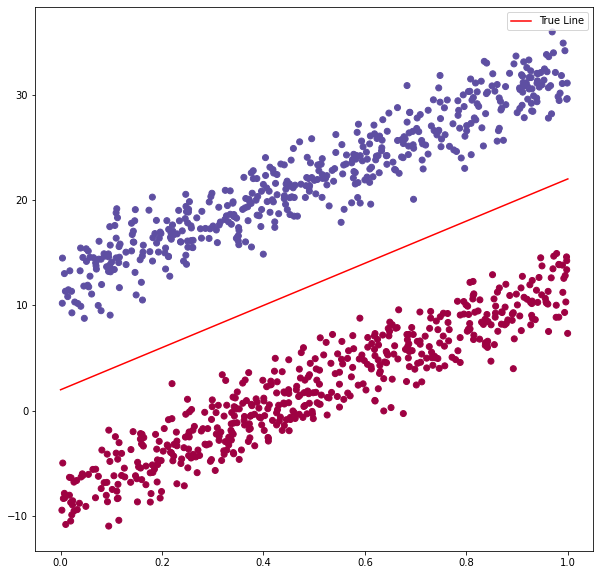

In [0]:
# generate random data into a multiple arrays
data, labels = get_random_data(w, b, mu, sigma, m)

# display the generated data on a scatter plot
display_random_data(data, labels)

# using decimals, split both data and labels into 80%/20%
perc = np.array([0.8, 0.2])
dataSplit  = np.split(data,   (len(data)   * perc[:1].cumsum()).astype(int))
labelSplit = np.split(labels, (len(labels) * perc[:1].cumsum()).astype(int))

# create training dataset
train_data   = dataSplit[0]
train_labels = labelSplit[0]

# create testing dataset
test_data   = dataSplit[1]
test_labels = labelSplit[1]

# converting it into a tuple
training = (train_data, train_labels)
testing  = (test_data, test_labels)

# Problem 2 - Training a Keras logistic regression model using our dataset

---


The following code:
  - Trains a model using only 2 layers (for simplicity):
    - Input layer of 2 neurons
    - Output layer of 1 neurons
  - It will use binary cross entropy to calculate its loss
  - It will also be trained using our generated training & testing datasets
  - The results will be displayed a scatter plot graph

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


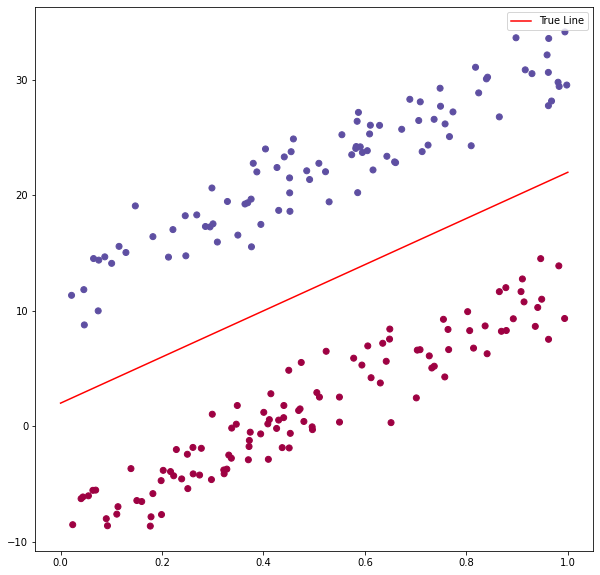

In [0]:
# Create model
model = Sequential()

# Add layers
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

# Set up loss, optimization, and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display summary of model
model.summary()

# Train model
history = model.fit(train_data, train_labels, epochs=300, verbose=0, validation_data=testing)

# Display the predicted results
display_random_data(test_data, np.round(model.predict(test_data)))



---


The following pieces of code was taken by Jeff Heaton in his following Youtube video: 

https://www.youtube.com/watch?v=7PWgx16kH8s

The code mentioned can be found here on his GitHub:

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_03_5_weights.ipynb

The purpose of this code was to display in a nice readable format the bias and weights of each layers in our model.

In [0]:
for layerNum, layer in enumerate(model.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    
    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

0B -> L1N0: 3.341172695159912
L0N0 -> L1N0 = 5.103919982910156
L0N1 -> L1N0 = -0.5063440203666687




---


Now that we have trained our model and viewed its prediction, we can now use the weights generated by Keras to figure out the predicted seperating line.

Note: That the sigmoid function goes as follows:

\begin{equation}
\frac{\left(1\right)}{\left(1\:+\:e^{-\left(z\right)}\right)}
\end{equation}

Where:

\begin{equation}
z\:=\:w_1x_1+\:w_2x_2\:+\:b \\
\end{equation}

 - $x_1$ is the first feature
 - $x_2$ is the second feature
 - $w_1$ is the weight of $x_1$
 - $w_2$ is the weight of $x_2$
 - $b$ is the bias term

\\

Recall that in a Sigmoid function, the values passed in will output a number between 0 and 1. The deciding factor of what a class (class 0 or 1) would be based on the values inserted will be based on whether said output is greater or less than 0.5.

Knowing that, if we could figure out the values to output 0.5 in our Sigmoid function, then these values could be represented by a line showing our seperating line. 

We already know the values for $w_1, w_2$ and $b$ through Keras's *get_weights()*.

Also note that our data resides within 0 and 1 on the x-axis.

Thus we can choose any $x_1$ and $x_2$ between 0 and 1.

All that's left is to solve for $x_2$ for each $x_1$ value. Through algebra, we can rewrite our sigmoid function to:

\begin{equation}
x_2=-\frac{w_1x_1+b}{w_2}
\end{equation}

\\

Finally, knowing our $x_2$ values we can plot the predicted seperating line

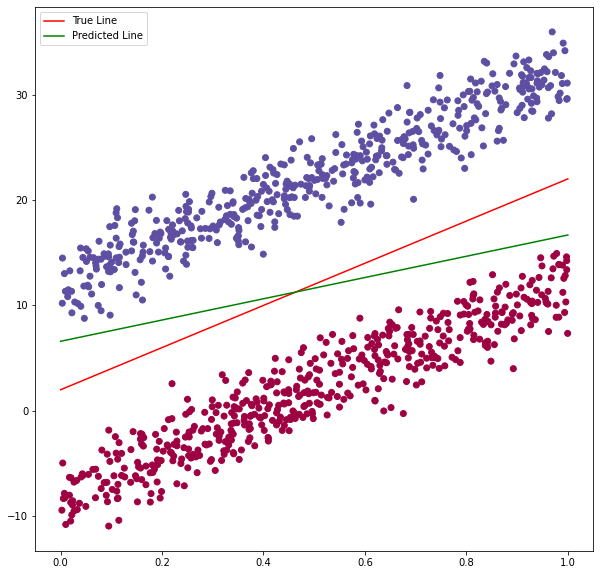

In [0]:
# obtained easily via code block above
bias = model.get_weights()[1][0]
w1 = model.get_weights()[0][0][0]
w2 = model.get_weights()[0][1][0]

plt.figure(figsize=[10,10])
x = np.linspace(0,1,100)
y = w * x + b
plt.plot(x, y, '-r', label='True Line')
plt.scatter(data[:,0], data[:,1], c=-labels, cmap="Spectral")

def get_yhat(x, w1, w2, bias):
  return -(x*w1 + bias)/ (w2)

y = get_yhat(x, w1, w2, bias)
plt.plot(x, y, '-g', label='Predicted Line')
plt.legend()
plt.show()

The model follows the function:

\begin{equation}
f: R^2 \rightarrow R
\end{equation}

Where two inputs produces one output. To better visualize this function, we can use a heatmap

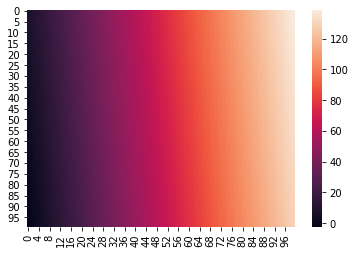

In [0]:
x_1, x_2 = np.meshgrid(np.linspace(data[0].min(), data[0].max(), 100), np.linspace(data[1].min(), data[1].max(), 100))
z = w1 * x_1  + w2 * x_2 + bias
sns.heatmap(z)
plt.show()

# Problem 3 - Creating logistic regression from scratch using numpy

---


In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(self, h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def fit(X, y):
    theta = np.zeros(X.shape[1])

    for i in range(epochs):
      z = np.dot(X, theta)
      h = sigmoid(z)
      gradient = np.dot(X.T, (h-y)) / y.size
      theta = theta - learn_rate * gradient

def predict(X):
    return sigmoid(np.dot(X, theta)).round()


In [0]:
X = test_data
y = test_labels

epochs = 500
learn_rate = 1

model = fit(X, y)